In [1]:
pip install numpy pandas seaborn scikit-fuzzy matplotlib requests


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Load dataset hasil cleaning
df = pd.read_csv("transaction.csv")

#
df.head()


,Amount,Mode,Income/Expense
0,30.0,Cash,Expense
1,60.0,Cash,Expense
2,199.0,Saving Bank Account 1,Expense
3,19.0,Saving Bank Account 1,Expense
4,251.0,Cash,Expense


In [4]:
# Jumlah baris dan kolom
print("Jumlah data:", df.shape)

# Informasi tipe data
print("\nInfo dataset:")
print(df.info())

# Cek missing value
print("\nMissing value per kolom:")
print(df.isnull().sum())

# Statistik ringkas
print("\nDeskripsi statistik:")
print(df.describe())


Jumlah data: (100, 3)

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Amount          100 non-null    float64
 1   Mode            100 non-null    object 
 2   Income/Expense  100 non-null    object 
dtypes: float64(1), object(2)
memory usage: 2.5+ KB
None

Missing value per kolom:
Amount            0
Mode              0
Income/Expense    0
dtype: int64

Deskripsi statistik:
             Amount
count    100.000000
mean    1613.084000
std     7301.040127
min        6.750000
25%       36.000000
50%       80.500000
75%      608.000000
max    70255.000000


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


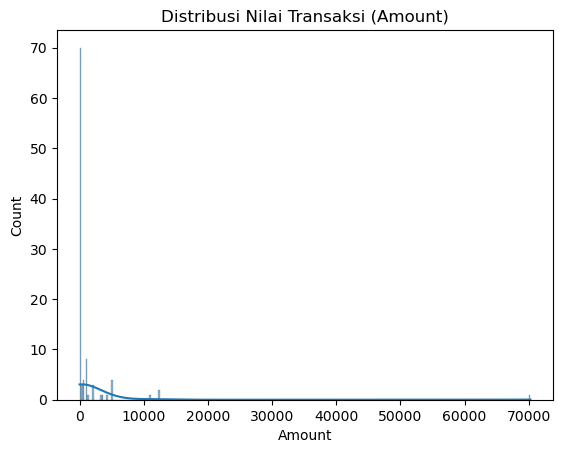

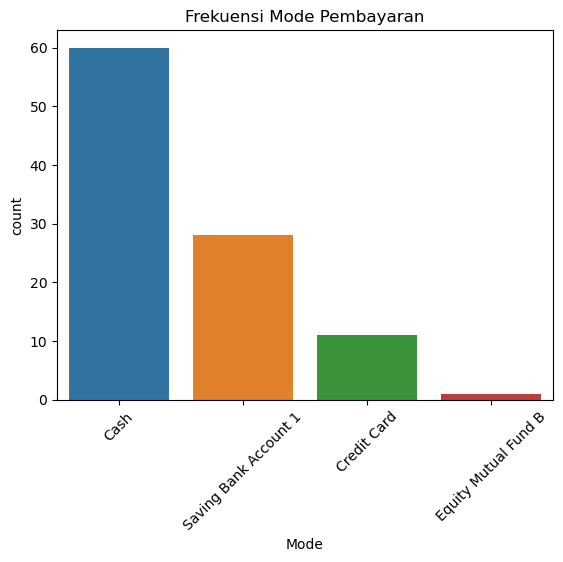

In [5]:
# Distribusi nilai Amount
sns.histplot(df["Amount"], kde=True)
plt.title("Distribusi Nilai Transaksi (Amount)")
plt.show()

# Frekuensi Mode Pembayaran
sns.countplot(data=df, x="Mode")
plt.title("Frekuensi Mode Pembayaran")
plt.xticks(rotation=45)
plt.show()

In [12]:
# Load dataset
df = pd.read_csv("transaction.csv")

# Pastikan kolom numerik
df["Amount"] = pd.to_numeric(df["Amount"], errors="coerce")
amax = float(df["Amount"].max())

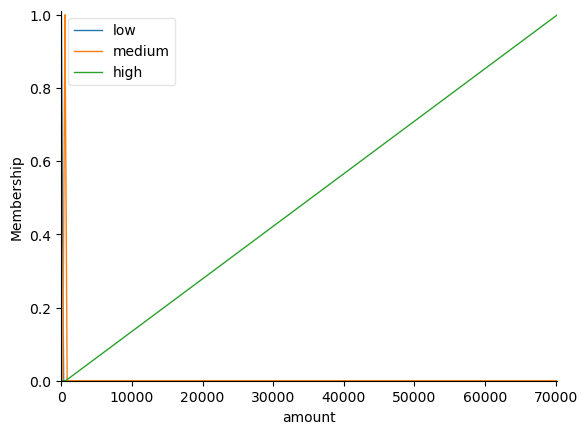

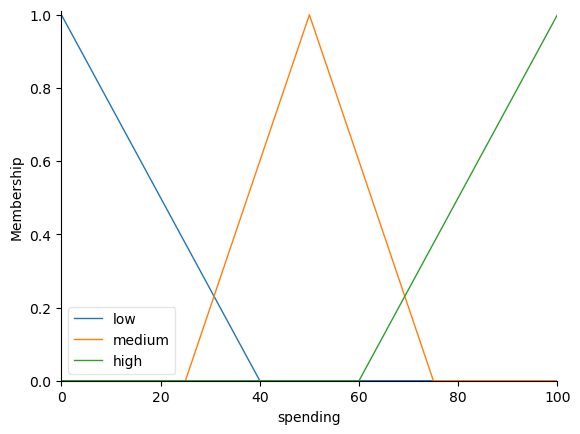

In [13]:
# Buat variabel fuzzy
amount = ctrl.Antecedent(np.arange(0, amax+1, 1), 'amount')
spending = ctrl.Consequent(np.arange(0, 101, 1), 'spending')

# Himpunan fuzzy untuk Amount
amount['low'] = fuzz.trimf(amount.universe, [0, 0, 300])
amount['medium'] = fuzz.trimf(amount.universe, [200, 500, 800])
amount['high'] = fuzz.trimf(amount.universe, [600, amax, amax])

# Himpunan fuzzy untuk Spending
spending['low'] = fuzz.trimf(spending.universe, [0, 0, 40])
spending['medium'] = fuzz.trimf(spending.universe, [25, 50, 75])
spending['high'] = fuzz.trimf(spending.universe, [60, 100, 100])

# Tampilkan fungsi keanggotaan
amount.view()
spending.view()


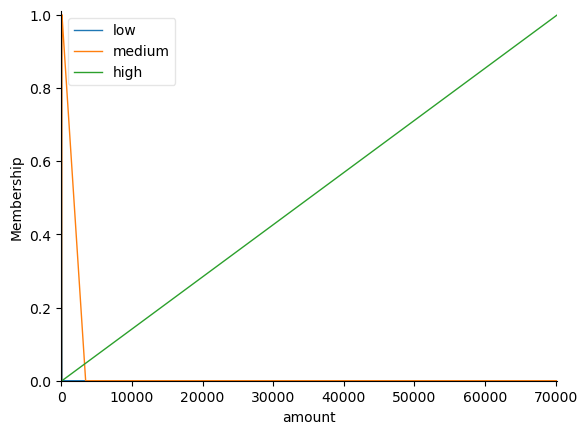

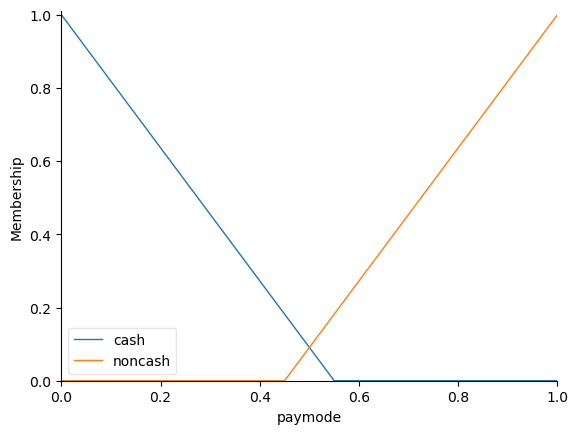

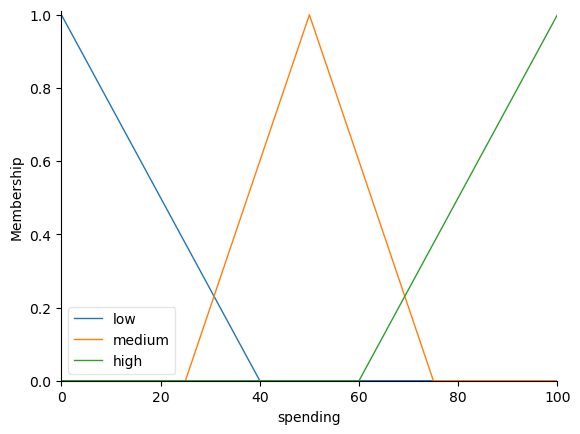

In [9]:
for v, title in [(amount,'Amount'), (paymode,'PayMode'), (spending,'Spending')]:
    v.view()
plt.show()


In [14]:
rule1 = ctrl.Rule(amount['low'], spending['low'])
rule2 = ctrl.Rule(amount['medium'], spending['medium'])
rule3 = ctrl.Rule(amount['high'], spending['high'])

spending_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
sim = ctrl.ControlSystemSimulation(spending_ctrl)


In [15]:
# Jalankan fuzzy untuk setiap Amount
spending_level = []

for value in df["Amount"]:
    sim.input['amount'] = float(value)
    sim.compute()
    score = sim.output['spending']

    # Konversi skor ke kategori
    if score < 40:
        level = "Low"
    elif score < 70:
        level = "Medium"
    else:
        level = "High"
    spending_level.append(level)

df["SpendingLevel"] = spending_level
df.head()


,Amount,Mode,Income/Expense,SpendingLevel
0,30.0,Cash,Expense,Low
1,60.0,Cash,Expense,Low
2,199.0,Saving Bank Account 1,Expense,Low
3,19.0,Saving Bank Account 1,Expense,Low
4,251.0,Cash,Expense,Low


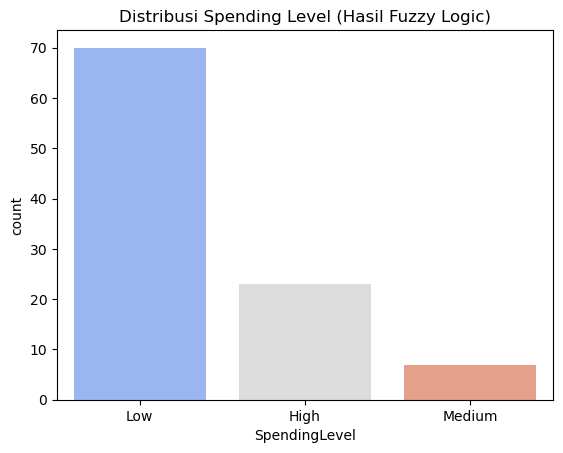

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


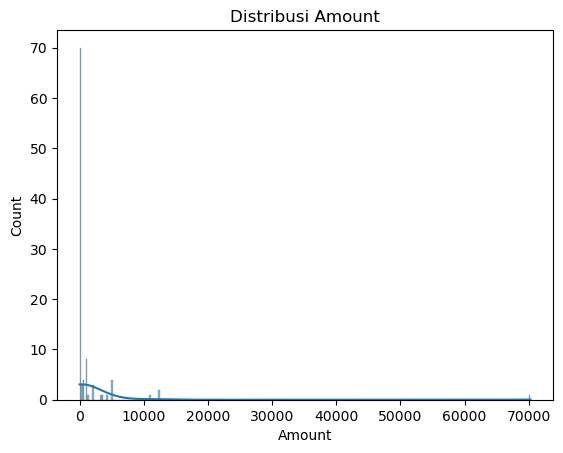

In [16]:
sns.countplot(data=df, x="SpendingLevel", palette="coolwarm")
plt.title("Distribusi Spending Level (Hasil Fuzzy Logic)")
plt.show()

sns.histplot(df["Amount"], kde=True)
plt.title("Distribusi Amount")
plt.show()
